# Imports

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltools.data import Brain_Data
import nilearn as nil
from pathlib import Path
from nltools.mask import expand_mask, collapse_mask

base_dir = Path('/Users/Esh/Documents/conferences/csss2022/CSSS22-TDA') # change me as needed
data_dir = base_dir / 'data'

## Load movie run

In [5]:
movie = Brain_Data(data_dir / 'movie_denoised.h5')
movie

nltools.data.brain_data.Brain_Data(data=(1364, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)

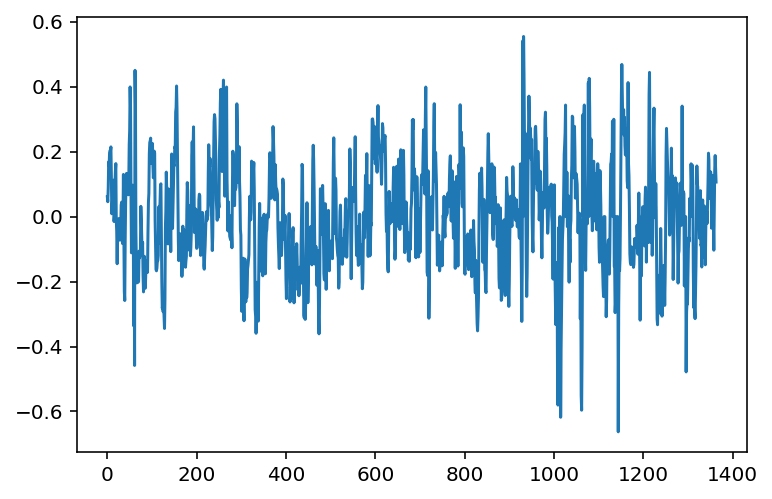

In [7]:
# Plot average time-series signal across whole-brain
plt.plot(movie.mean(axis=1))

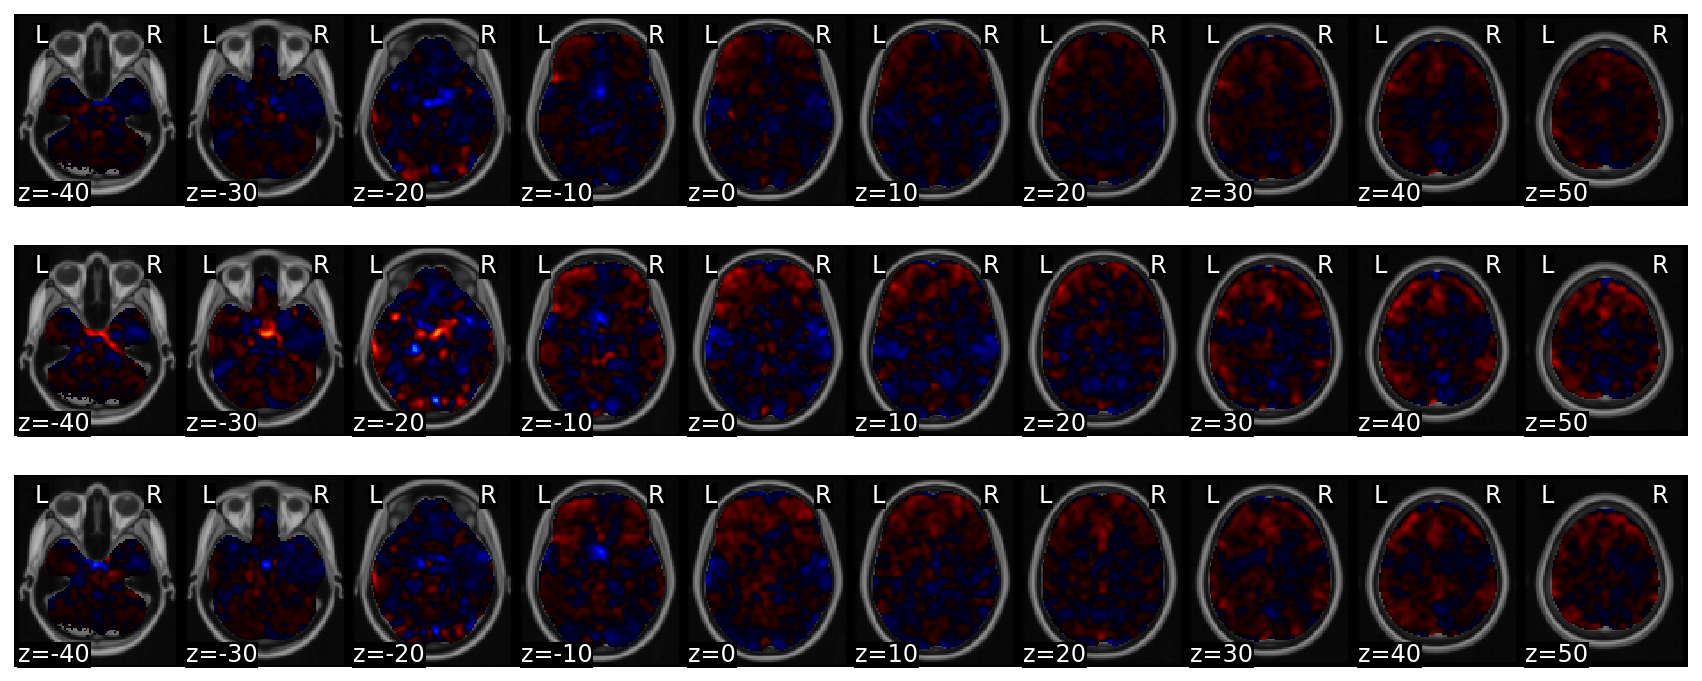

In [9]:
# Plot first few TRs
movie[:3].plot()

## Load rest run

In [6]:
rest = Brain_Data(data_dir / 'rest_denoised.h5')
rest

nltools.data.brain_data.Brain_Data(data=(180, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)

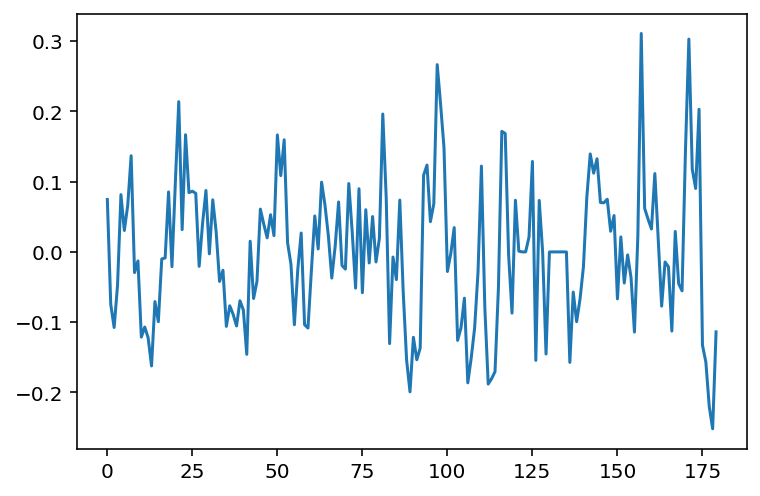

In [11]:
# Plot average time-series signal across whole-brain
plt.plot(rest.mean(axis=1))

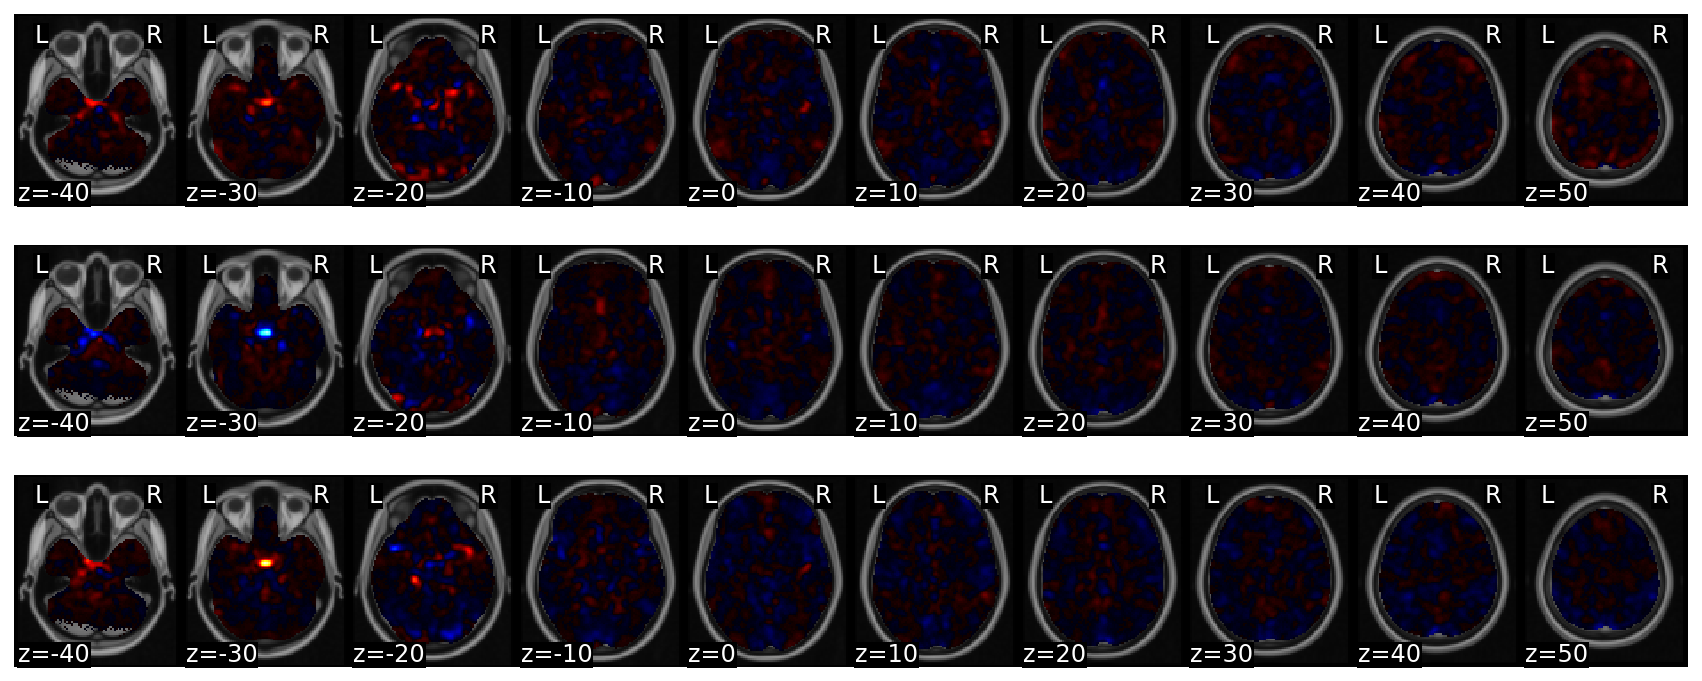

In [10]:
# Plot first few TRs
rest[:3].plot()

## Get parcellations

In [14]:
yeo = nil.datasets.fetch_atlas_yeo_2011()
difumo = nil.datasets.fetch_atlas_difumo()

/Users/Esh/anaconda3/lib/python3.8/site-packages/nilearn/datasets/atlas.py:130: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [84]:
yeo_brain = Brain_Data(yeo['thin_17'])

/var/folders/g3/k36shgps5c75hyl9xhjk3cb80000gn/T/ipykernel_5987/4050345064.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yeo_brain.data = yeo_brain.data.astype(np.int)


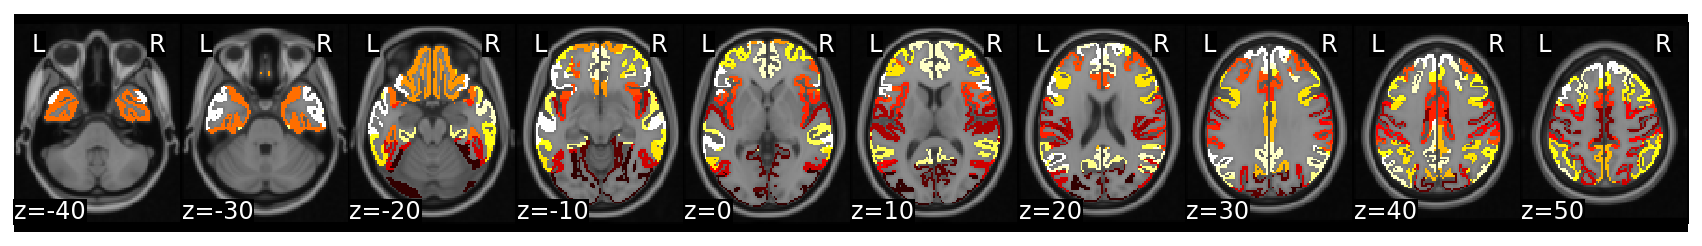

In [85]:
yeo_brain.data = yeo_brain.data.astype(np.int)
yeo_brain.plot()
yeo_brain_expanded = expand_mask(yeo_brain)

In [95]:
# Loop over networks
for network in yeo_brain_expanded:
    # Extract time x voxels for each network
    # 2d voxels dim changes
    network_2d = rest.apply_mask(network).data

    # Extract X x Y x Z x time for each network
    # 4d with 0s for locations that are outside of mask
    network_4d = rest.apply_mask(yeo_brain_expanded[0]).to_nifti().get_fdata()

In [96]:
# Shape of the last network
network_2d.shape
network_4d.shape

(180, 7239)

(91, 109, 91, 180)

In [ ]:
# Apply mapper...